In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [59]:
df = pd.read_csv('../input/data.csv')
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [61]:
df.describe()

,Video views
count,5.000000e+03
mean,1.071449e+09
std,2.003844e+09
min,7.500000e+01
25%,1.862329e+08
50%,4.820548e+08
75%,1.124368e+09
max,4.754884e+10


The describe() method just gives one column, the 'Video Uploads' and 'Subscribers' are have 'object' datatype. Let's convert them to numeric value for better analysis. For that let's observe these series indiviually.

In [62]:
df['Subscribers'].value_counts()

--          387
92158         2
666561        2
553656        1
5721768       1
6308028       1
1227432       1
18487595      1
1208974       1
1303595       1
10580428      1
412635        1
70979         1
781933        1
105359        1
410311        1
5788897       1
717374        1
299807        1
3551228       1
216849        1
328377        1
3653959       1
2938922       1
670509        1
1080829       1
2293472       1
842216        1
10846501      1
109556        1
           ... 
6427          1
1586835       1
1080240       1
988900        1
1597514       1
1163116       1
76560         1
675233        1
1004597       1
78380         1
8219221       1
1283754       1
2020441       1
1861616       1
1583176       1
2196875       1
7073141       1
6994479       1
3438920       1
14796         1
1470934       1
1158939       1
2096618       1
2122591       1
1135733       1
6598377       1
2298236       1
18753006      1
1241638       1
4795224       1
Name: Subscribers, Lengt

The value with highest count is obviously a missing values.Let's skip the rows with these missing values as just filling them with the mean would lead to less variance in the data.

In [63]:
missing_val = df['Subscribers'].value_counts().index[0]
df_1 = df[df['Subscribers'] != missing_val]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4613 entries, 0 to 4999
Data columns (total 6 columns):
Rank             4613 non-null object
Grade            4613 non-null object
Channel name     4613 non-null object
Video Uploads    4613 non-null object
Subscribers      4613 non-null object
Video views      4613 non-null int64
dtypes: int64(1), object(5)
memory usage: 252.3+ KB


In [64]:
df_1['Subscribers'] = pd.to_numeric(df_1['Subscribers'])
df_1.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Subscribers,Video views
count,4.613000e+03,4.613000e+03
mean,2.620004e+06,1.137713e+09
std,3.926447e+06,2.068211e+09
min,3.010000e+02,7.500000e+01
25%,6.098940e+05,2.188379e+08
50%,1.350477e+06,5.365047e+08
75%,2.950056e+06,1.194442e+09
max,6.599531e+07,4.754884e+10


Now let's convert 'Video Uploads' to numeric values.

In [65]:
vid_upload_no_miss = pd.to_numeric(df_1['Video Uploads'], errors = 'coerce')
vid_upload_no_miss

0        82757.0
1        12661.0
2          373.0
3        27323.0
4        36756.0
5        30243.0
6         8500.0
7       100147.0
8         1140.0
9        74607.0
10        2085.0
11         822.0
12         150.0
13          50.0
14       16119.0
15       49239.0
16        4778.0
18        3060.0
19       24287.0
20          48.0
21        3403.0
22       19358.0
23        1833.0
24      186194.0
25        5076.0
26         277.0
27         555.0
28       92250.0
29         230.0
30       79497.0
          ...   
4969       110.0
4970     13547.0
4971      1206.0
4972      2071.0
4973       202.0
4974       153.0
4975         1.0
4976       297.0
4977      2184.0
4978        49.0
4979       707.0
4980       878.0
4981         5.0
4982      9876.0
4983       242.0
4984      2116.0
4985       191.0
4986      7299.0
4987      1358.0
4988        80.0
4989       219.0
4991        11.0
4992        25.0
4993      1055.0
4994      1735.0
4995       706.0
4996       797.0
4997       110

In [66]:
vid_upload_no_miss_fill = vid_upload_no_miss.fillna(value = -1)
vid_upload_no_miss_fill.describe()

count      4613.000000
mean       4083.088229
std       17720.700428
min          -1.000000
25%         148.000000
50%         463.000000
75%        1591.000000
max      422326.000000
Name: Video Uploads, dtype: float64

In [67]:
df_2 = df_1.drop('Video Uploads', axis = 1)
df_3 = pd.concat([df_2, vid_upload_no_miss_fill], axis = 1)
df_3 = df_3[df_3['Video Uploads'] != -1]
df_3.describe()

,Subscribers,Video views,Video Uploads
count,4.610000e+03,4.610000e+03,4610.000000
mean,2.621527e+06,1.138403e+09,4085.745987
std,3.927263e+06,2.068706e+09,17726.160260
min,3.010000e+02,7.500000e+01,1.000000
25%,6.101925e+05,2.189184e+08,148.000000
50%,1.350884e+06,5.368886e+08,464.000000
75%,2.950921e+06,1.195115e+09,1592.500000
max,6.599531e+07,4.754884e+10,422326.000000


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06be7ce160>,
      dtype=object)

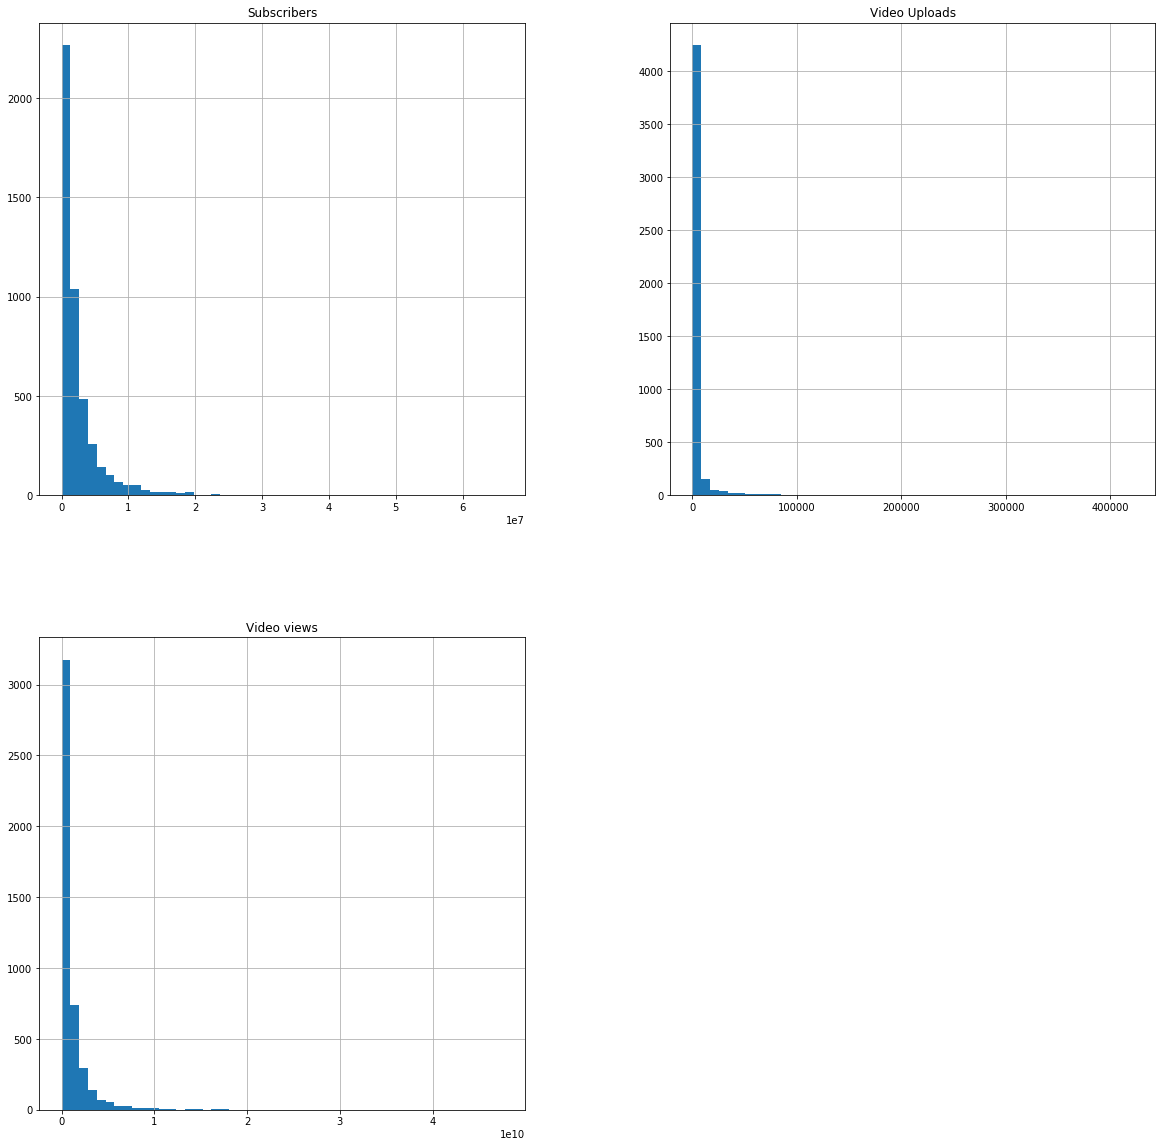

In [68]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (20, 20))
df_3.hist(bins = 50, ax = ax)

Thus the distribution is quite skewed, many channels (>2000) in the dataset have < 1.25e6 subscribers, majority of the channels have video uploads much less than 100000, and also <3000 channels have views much less than 1e10.

In [69]:
df_3.head()

,Rank,Grade,Channel name,Subscribers,Video views,Video Uploads
0,1st,A++,Zee TV,18752951,20869786591,82757.0
1,2nd,A++,T-Series,61196302,47548839843,12661.0
2,3rd,A++,Cocomelon - Nursery Rhymes,19238251,9793305082,373.0
3,4th,A++,SET India,31180559,22675948293,27323.0
4,5th,A++,WWE,32852346,26273668433,36756.0


The top 50 subscribed channels on Youtube are:

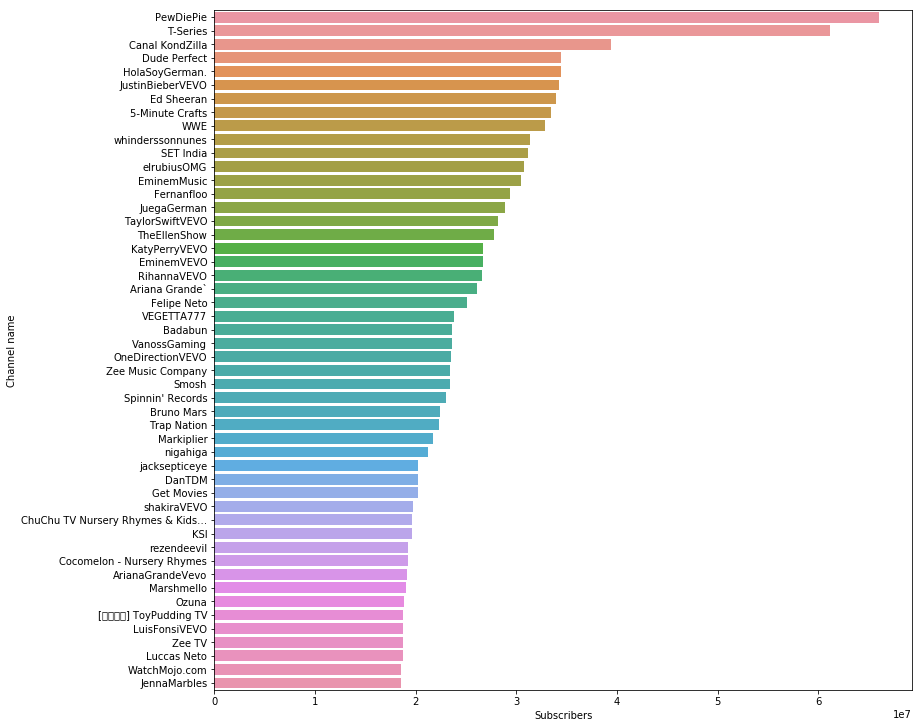

In [70]:
import seaborn as sns
df_subs_and_channels = df_3[['Channel name', 'Subscribers']].sort_values('Subscribers', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (12.5, 12.5))
sns.barplot(y = 'Channel name', x = 'Subscribers', data = df_subs_and_channels_top_50, orient = 'h',ax = ax)

Top 50 channels with most views are:

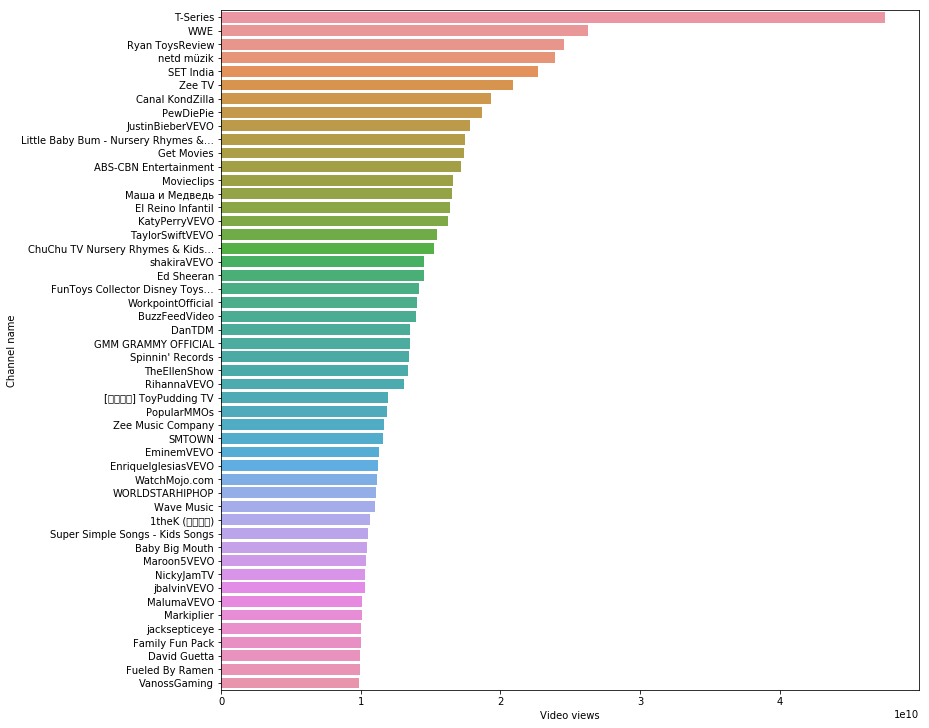

In [71]:
df_views_and_channels_top_50 = df_3[['Channel name', 'Video views']].sort_values('Video views', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (12.5, 12.5))
sns.barplot(y = 'Channel name', x = 'Video views', data = df_views_and_channels_top_50, orient = 'h',ax = ax)

Top 50 channels with most videos uploaded are:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


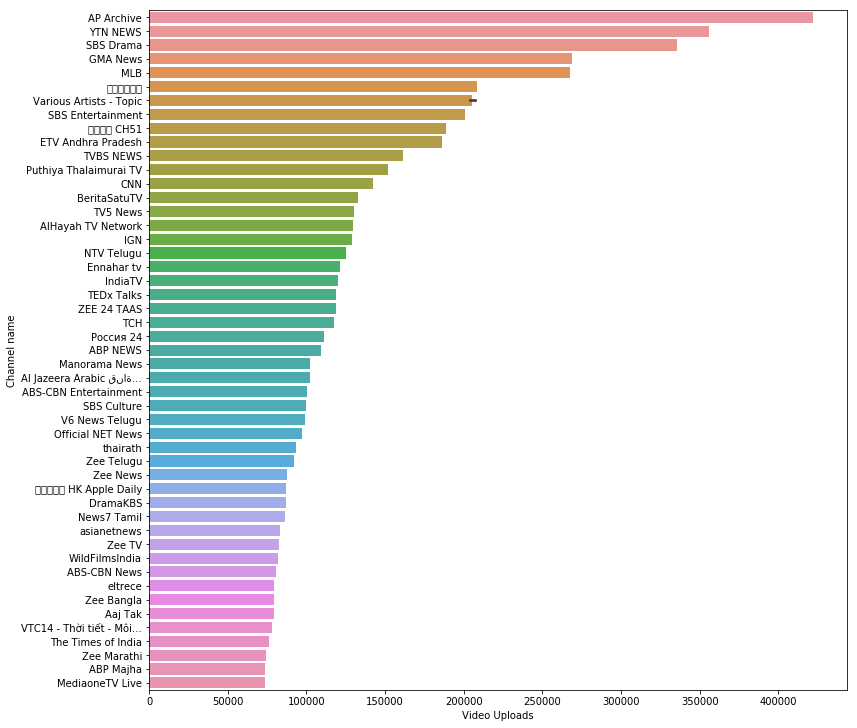

In [72]:
df_views_and_channels_top_50 = df_3[['Channel name', 'Video Uploads']].sort_values('Video Uploads', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (12.5, 12.5))
sns.barplot(y = 'Channel name', x = 'Video Uploads', data = df_views_and_channels_top_50, orient = 'h',ax = ax)

The distribution of Grades is as follows,

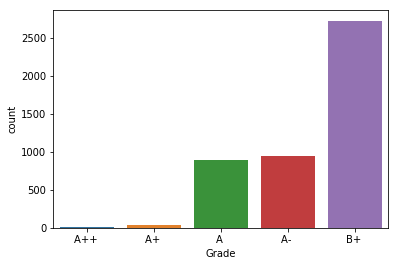

In [73]:
import seaborn as sns
sns.countplot(df_3['Grade'])

Thus more than half channels have B+ grade.

Now, let's see the relationship between the rank and grade of a channel.

In [74]:
df_rank_grade = df_3[['Rank', 'Grade']]

Let's observe the rank distribution of the  df_rank_grade dataframe. Let's convert the Rank series of 'df_rank_grade' to int so analysis becomes easier.

Let's modify the 'Rank' Series.

In [75]:
l = list(df_rank_grade['Rank'])
rank_list = [i.split(',')[0] + i.split(',')[1] if i[1] == ',' else i[:-2] for i in l]
final_list = [i[:-2] if len(i) == 6 else i for i in rank_list]
int_rank_series = pd.DataFrame(final_list, columns = ['Rank'], dtype = int)
df_rank_grade = df_rank_grade.drop('Rank', axis = 1)
df_rank_grade_new = pd.concat([df_rank_grade, int_rank_series], axis = 1)
df_rank_grade_new.head()

,Grade,Rank
0,A++,1.0
1,A++,2.0
2,A++,3.0
3,A++,4.0
4,A++,5.0


Let's see the relationship between the columns via a boxplot,

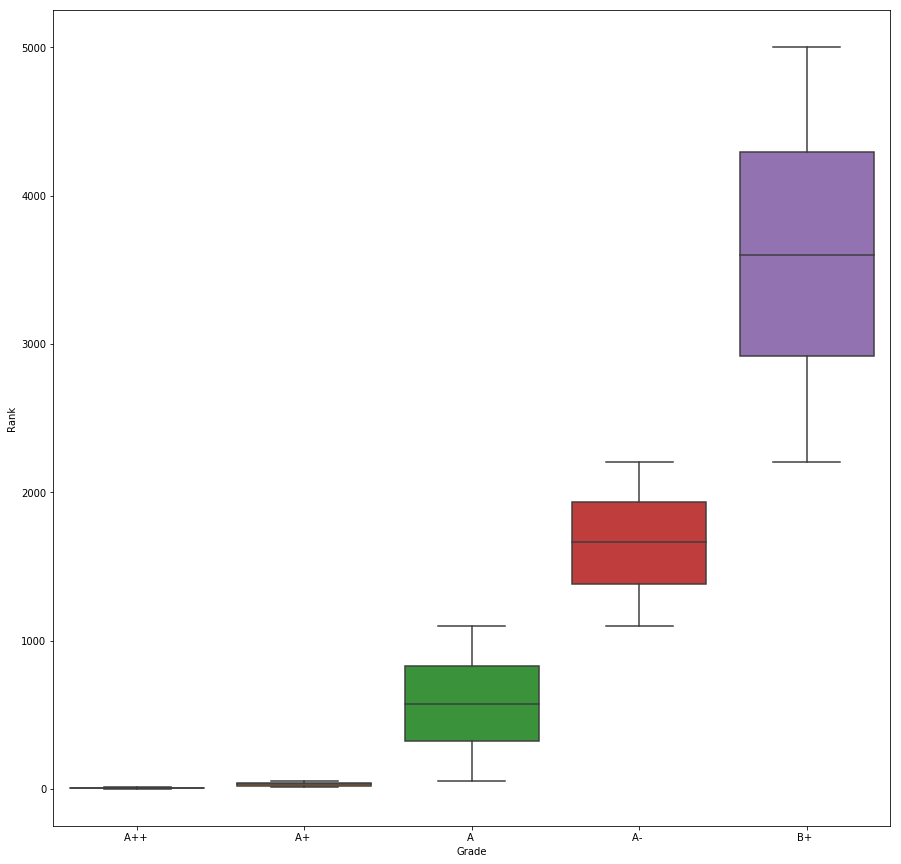

In [76]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(x = 'Grade', y = 'Rank', data = df_rank_grade_new, ax = ax)

It can be clearly seen that there is a clear demarcation between various grades of channels based on their ranks, thus, the ranks of channels are very good indicators of grade of a channel.

From the boxplot, median Rank of a B+ grade channel is about 3600. That of A- channel is ~1700, that of A grade channel is ~700. For A+ channels it is about 70-100, while for A++ channel,

In [77]:
df_rank_grade_new[df_rank_grade_new['Grade'] == 'A++ ']

,Grade,Rank
0,A++,1.0
1,A++,2.0
2,A++,3.0
3,A++,4.0
4,A++,5.0
5,A++,6.0
6,A++,7.0
7,A++,8.0
8,A++,9.0
9,A++,10.0


Only top 10 channels have A++ grade.

Let's see the relationship between Grade and Subscribers,

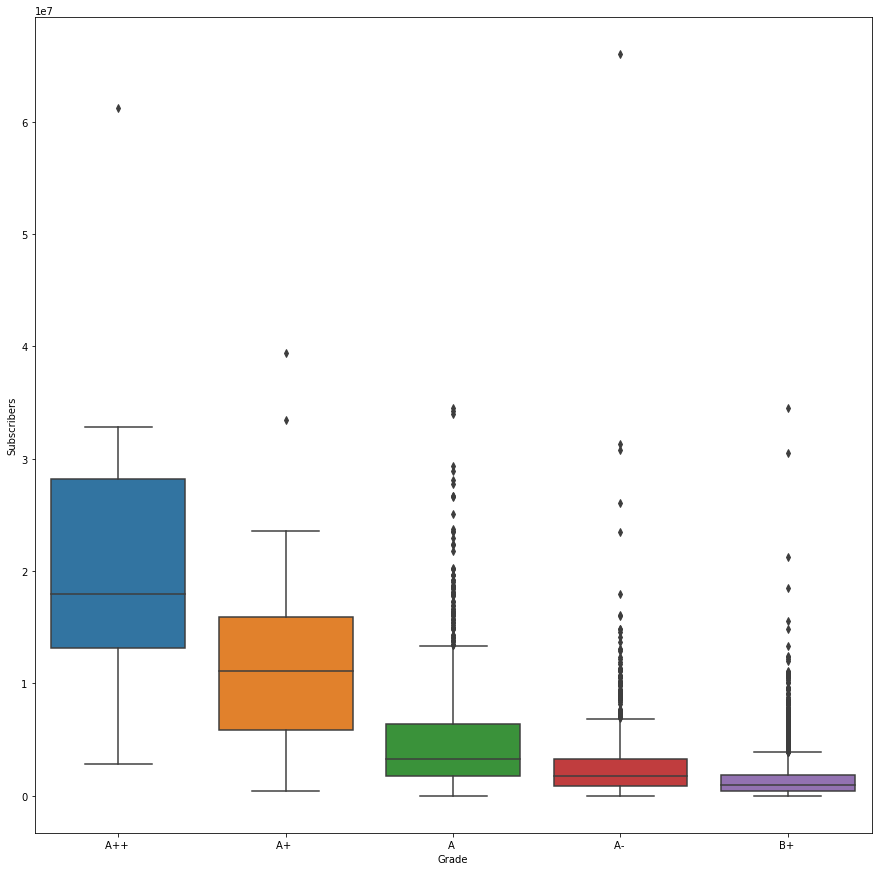

In [78]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(x = 'Grade', y = 'Subscribers', data = df_3)   

There is a substantial amount of overlap between the boxes of some of the grades, also there are a lot of  outliers, thus the number of subscribers is not a very good indicator of the Grade of the channel.

Let's compare the number of subscribers with the Rank of the channels,

Text(0, 0.5, 'Number of Subscribers.')

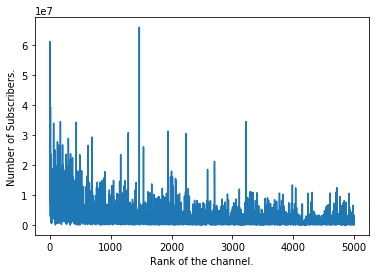

In [79]:
df_3['Subscribers'].plot()
plt.xlabel('Rank of the channel.')
plt.ylabel('Number of Subscribers.')

It is evident from the plot that the channels are not ranked according to the number of subscribers.

Let's compare the Video Uploads with the Rank.

Text(0, 0.5, 'Number of uploaded videos.')

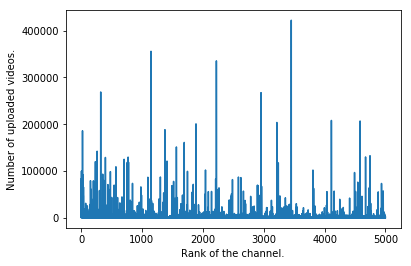

In [80]:
df_3['Video Uploads'].plot()
plt.xlabel('Rank of the channel.')
plt.ylabel('Number of uploaded videos.')

Thus, the ranking of the channels also does not depend upon video uploads.

Let's compare Video Uploads with grade of the channel.

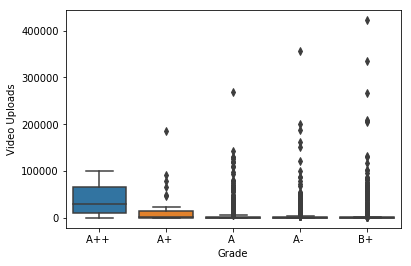

In [81]:
sns.boxplot(x = 'Grade', y = 'Video Uploads', data = df_3)

Thus, the distribution of Video Uploads with respect to the Grade of the channels is not quite insightful. 

Let's comapre Video views with the rank.

Text(0, 0.5, 'Total number of views')

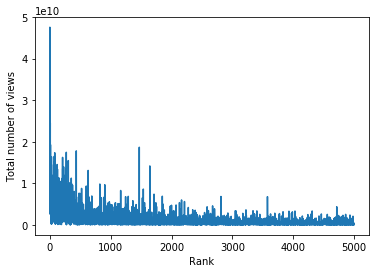

In [82]:
df_3['Video views'].plot()
plt.xlabel('Rank')
plt.ylabel('Total number of views')

Video views seems to influence the rank of the channel (barring a few exceptions where there are spikes in the plot).

Comparing Grade of the channel to the VIdeo views,

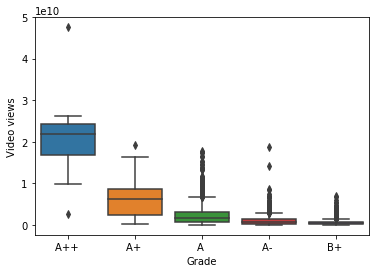

In [83]:
sns.boxplot(x = 'Grade', y = 'Video views', data = df_3)

From the boxplot, it can be seen that higher the number of video views, better is the grade (roughly).

Now, let's make comparisons among continous variables,

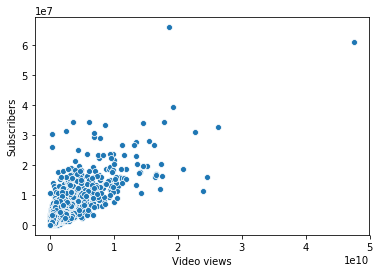

In [84]:
sns.scatterplot(x = 'Video views', y = 'Subscribers', data = df_3)

There is a clear positive trend between the two variables, i.e more video views generally have positive correlation with number of subscribers. Also the relationship seems to be linear.

Confirming it mathematically,

In [85]:
corr_coef = np.corrcoef(x = df_3['Video views'], y = df_3['Subscribers'])
corr_coef

array([[1.        , 0.79124115],
       [0.79124115, 1.        ]])

Hence, a very strong positive correlation is verified.

Comparing Video Uploads with the subscribers,

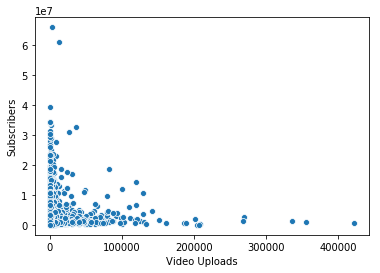

In [86]:
sns.scatterplot(x = 'Video Uploads', y = 'Subscribers', data = df_3)

This relationship is very different from the one above, generally subscribers tend to decrease for the channels having very large number of videos uploaded, while for very low number of videos uploaded, there is a large variance. There is no strong linear relationship between the two variables though.

Finding out the correlation mathematically,

In [87]:
corr_coef = np.corrcoef(x = df_3['Video Uploads'], y = df_3['Subscribers'])
corr_coef

array([[1.        , 0.01136205],
       [0.01136205, 1.        ]])

Thus, weak correlation is confirmed mathematically,

Comapring Video Uploads and Video Views with respect to subscribers,

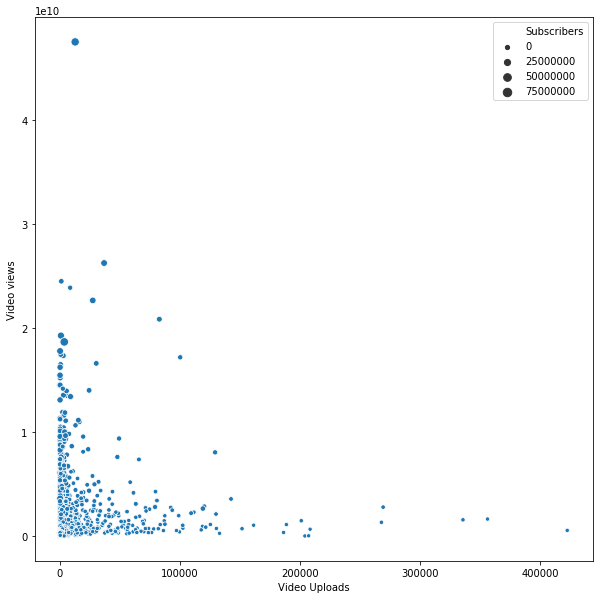

In [88]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(x = 'Video Uploads', y = 'Video views', size = 'Subscribers', data = df_3, ax = ax)

Again the relationship between the two variables is not strongly linear.

Let's create a new feature "Views per Upload". This feature might help in better analysis.

In [89]:
df_3['Views per Upload'] = df_3['Video views'] / df_3['Video Uploads']
df_3['Views per Upload'].head()

0    2.521815e+05
1    3.755536e+06
2    2.625551e+07
3    8.299216e+05
4    7.148130e+05
Name: Views per Upload, dtype: float64

Let's compare the 'Views per Upload' with the number of subscribers,

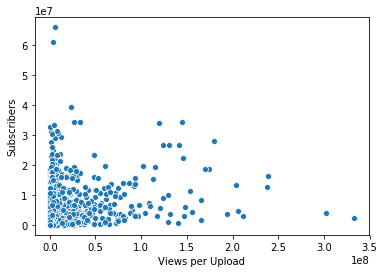

In [90]:
sns.scatterplot(x = 'Views per Upload', y = 'Subscribers', data = df_3)

Thus, this feature seems to have a more strong relationship with the number of Subscribers than Video Uploads.Let's verify mathematically,

In [91]:
corr_coef = np.corrcoef(x = df_3['Views per Upload'], y = df_3['Subscribers'])
corr_coef

array([[1.        , 0.28938596],
       [0.28938596, 1.        ]])

Thus the newly made feature has a better correlation with Subscribers than Video Uploads. Hence the new feature can be very useful to predict number of subscribers.

Thus the **conclusions** from the above analysis are:
1. There is a clear demarcation between various grades of channels based on their ranks, thus, the ranks of channels are very good indicators of grade of a channel.
2. The number of subscribers is not a very good indicator of the Grade of the channel.
3. Video views seems to influence the rank of the channel (although there are a few exceptions).
4. Higher the number of video views, higher is the grade (roughly).
5. There is a clear positive trend between the two variables, i.e more video views generally have strong positive correlation with number of subscribers.
6.  Generally number of subscribers are low for the channels having very large number of videos uploaded, while for channels having very low number of videos uploaded, there is a large variance. There is no strong linear relationship between the two variables though.
7. Video Uploads per view feature has a more strong relationship with the number of Subscribers than Video Uploads.The same is suggested mathematically too. Hence is a better feature for predicting number of subscribers of a channel.